<Figure size 720x432 with 0 Axes>

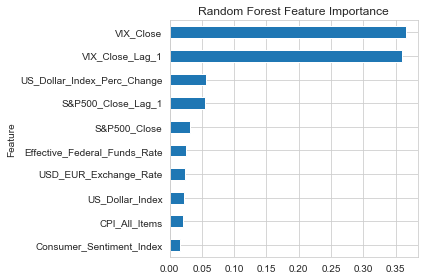

<Figure size 720x432 with 0 Axes>

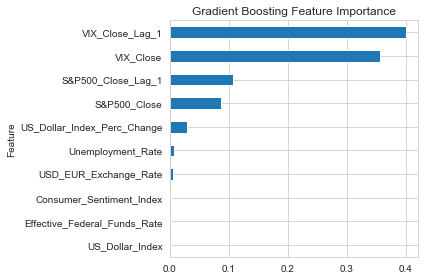

Random Forest Metrics: {'MSE': 0.9555700790735551, 'R²': 0.4938243805226533}
Gradient Boosting Metrics: {'MSE': 1.102662379256931, 'R²': 0.41590802692789297}
Top Random Forest Features:
                         Feature  Importance
1                      VIX_Close    0.365849
10               VIX_Close_Lag_1    0.359966
11   US_Dollar_Index_Perc_Change    0.056660
9             S&P500_Close_Lag_1    0.055632
0                   S&P500_Close    0.032180
7   Effective_Federal_Funds_Rate    0.026128
8          USD_EUR_Exchange_Rate    0.023442
3                US_Dollar_Index    0.021661
6                  CPI_All_Items    0.020244
4       Consumer_Sentiment_Index    0.016183
Top Gradient Boosting Features:
                         Feature  Importance
10               VIX_Close_Lag_1    0.399868
1                      VIX_Close    0.355575
9             S&P500_Close_Lag_1    0.107105
0                   S&P500_Close    0.086915
11   US_Dollar_Index_Perc_Change    0.029031
5              Un

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the dataset
file_path = 'final_dataset1.csv'
data = pd.read_csv(file_path)
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'], errors='coerce')
data.set_index('Unnamed: 0', inplace=True)

# Convert object columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Step 2: Feature Engineering
# Retain relevant columns
selected_columns = [
    'S&P500_Close', 'VIX_Close', 'GDP', 'US_Dollar_Index',
    'Consumer_Sentiment_Index', 'Unemployment_Rate',
    'CPI_All_Items', 'Effective_Federal_Funds_Rate', 'USD_EUR_Exchange_Rate'
]
adjusted_data = data[selected_columns]

# Define the target variable
adjusted_data['S&P500_Close_Perc_Change'] = adjusted_data['S&P500_Close'].pct_change() * 100

# Lagged features for S&P500_Close and VIX_Close
adjusted_data['S&P500_Close_Lag_1'] = adjusted_data['S&P500_Close'].shift(1)
adjusted_data['VIX_Close_Lag_1'] = adjusted_data['VIX_Close'].shift(1)

# Percentage change for volatile macroeconomic variables
volatile_features = ['US_Dollar_Index', 'Consumer_Sentiment_Index']
for col in volatile_features:
    adjusted_data[f'{col}_Perc_Change'] = adjusted_data[col].pct_change() * 100

# Log transform specific features
features_to_log_transform = ['Unemployment_Rate', 'Effective_Federal_Funds_Rate']
for feature in features_to_log_transform:
    adjusted_data[feature] = adjusted_data[feature].apply(lambda x: np.log(x + 1))

# Drop rows with NaN or infinity values
adjusted_data.replace([np.inf, -np.inf], np.nan, inplace=True)
adjusted_data.dropna(inplace=True)

# Step 3: Standardize the features
scaler = StandardScaler()
adjusted_features = adjusted_data.drop(columns=['S&P500_Close_Perc_Change'])
adjusted_features_scaled = pd.DataFrame(
    scaler.fit_transform(adjusted_features),
    columns=adjusted_features.columns,
    index=adjusted_features.index
)

# Retain the target variable
y_adjusted = adjusted_data['S&P500_Close_Perc_Change']

# Step 4: Split the dataset into training and testing sets
train_size = int(0.8 * len(adjusted_features_scaled))
X_train_adj, X_test_adj = adjusted_features_scaled[:train_size], adjusted_features_scaled[train_size:]
y_train_adj, y_test_adj = y_adjusted[:train_size], y_adjusted[train_size:]

# Step 5: Train Random Forest and Gradient Boosting models
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

rf_model.fit(X_train_adj, y_train_adj)
gb_model.fit(X_train_adj, y_train_adj)

# Make predictions
rf_predictions = rf_model.predict(X_test_adj)
gb_predictions = gb_model.predict(X_test_adj)

# Evaluate models
rf_mse = mean_squared_error(y_test_adj, rf_predictions)
rf_r2 = r2_score(y_test_adj, rf_predictions)

gb_mse = mean_squared_error(y_test_adj, gb_predictions)
gb_r2 = r2_score(y_test_adj, gb_predictions)

# Feature importance
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train_adj.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

gb_feature_importance = gb_model.feature_importances_
gb_feature_importance_df = pd.DataFrame({
    'Feature': X_train_adj.columns,
    'Importance': gb_feature_importance
}).sort_values(by='Importance', ascending=False)

# Step 6: Visualize Feature Importance
plt.figure(figsize=(10, 6))
rf_feature_importance_df.head(10).plot(
    x='Feature', y='Importance', kind='barh', legend=False, title='Random Forest Feature Importance'
)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
gb_feature_importance_df.head(10).plot(
    x='Feature', y='Importance', kind='barh', legend=False, title='Gradient Boosting Feature Importance'
)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print metrics and top features
print("Random Forest Metrics:", {"MSE": rf_mse, "R²": rf_r2})
print("Gradient Boosting Metrics:", {"MSE": gb_mse, "R²": gb_r2})
print("Top Random Forest Features:")
print(rf_feature_importance_df.head(10))
print("Top Gradient Boosting Features:")
print(gb_feature_importance_df.head(10))


<Figure size 1440x720 with 0 Axes>

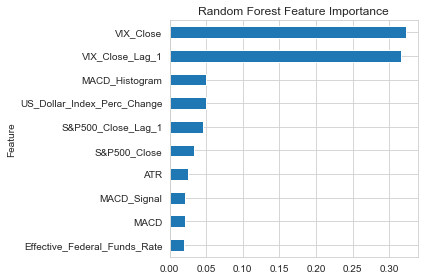

<Figure size 1440x720 with 0 Axes>

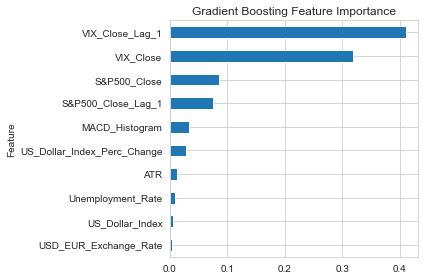

Random Forest Metrics: {'MSE': 0.9621021644428912, 'R²': 0.4912319474924881, 'MAE': 0.5859878989143443}
Gradient Boosting Metrics: {'MSE': 1.074386611283214, 'R²': 0.4318549483991393, 'MAE': 0.6250189520792536}
Top Random Forest Features:
                         Feature  Importance
1                      VIX_Close    0.322805
12               VIX_Close_Lag_1    0.316318
17                MACD_Histogram    0.050223
13   US_Dollar_Index_Perc_Change    0.049325
11            S&P500_Close_Lag_1    0.046257
0                   S&P500_Close    0.033418
18                           ATR    0.024691
16                   MACD_Signal    0.020875
15                          MACD    0.020409
7   Effective_Federal_Funds_Rate    0.019644
Top Gradient Boosting Features:
                        Feature  Importance
12              VIX_Close_Lag_1    0.410107
1                     VIX_Close    0.317605
0                  S&P500_Close    0.086074
11           S&P500_Close_Lag_1    0.075064
17            

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the dataset
file_path = 'final_dataset1.csv'
data = pd.read_csv(file_path)
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'], errors='coerce')
data.set_index('Unnamed: 0', inplace=True)

# Convert object columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Step 2: Feature Engineering
# Retain relevant columns
selected_columns = [
    'S&P500_Close', 'VIX_Close', 'GDP', 'US_Dollar_Index',
    'Consumer_Sentiment_Index', 'Unemployment_Rate',
    'CPI_All_Items', 'Effective_Federal_Funds_Rate', 'USD_EUR_Exchange_Rate',
    'S&P500_High', 'S&P500_Low']
adjusted_data = data[selected_columns]

# Define the target variable for percentage change prediction
adjusted_data['S&P500_Close_Perc_Change'] = adjusted_data['S&P500_Close'].pct_change() * 100

# Lagged features for S&P500_Close and VIX_Close
adjusted_data['S&P500_Close_Lag_1'] = adjusted_data['S&P500_Close'].shift(1)
adjusted_data['VIX_Close_Lag_1'] = adjusted_data['VIX_Close'].shift(1)

# Percentage change for volatile macroeconomic variables
volatile_features = ['US_Dollar_Index', 'Consumer_Sentiment_Index']
for col in volatile_features:
    adjusted_data[f'{col}_Perc_Change'] = adjusted_data[col].pct_change() * 100

# Log transform specific features
features_to_log_transform = ['Unemployment_Rate', 'Effective_Federal_Funds_Rate']
for feature in features_to_log_transform:
    adjusted_data[feature] = adjusted_data[feature].apply(lambda x: np.log(x + 1))

# Create MACD features
fast_ema = adjusted_data['S&P500_Close'].ewm(span=12, adjust=False).mean()
slow_ema = adjusted_data['S&P500_Close'].ewm(span=26, adjust=False).mean()
adjusted_data['MACD'] = fast_ema - slow_ema
adjusted_data['MACD_Signal'] = adjusted_data['MACD'].ewm(span=9, adjust=False).mean()
adjusted_data['MACD_Histogram'] = adjusted_data['MACD'] - adjusted_data['MACD_Signal']

# Create ATR feature
high_low = adjusted_data['S&P500_High'] - adjusted_data['S&P500_Low']
high_close = np.abs(adjusted_data['S&P500_High'] - adjusted_data['S&P500_Close'].shift())
low_close = np.abs(adjusted_data['S&P500_Low'] - adjusted_data['S&P500_Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
adjusted_data['ATR'] = true_range.rolling(14).mean()

# Create RSI feature
close_delta = adjusted_data['S&P500_Close'].diff()
up = close_delta.clip(lower=0)
down = -1 * close_delta.clip(upper=0)
ma_up = up.ewm(com=14 - 1, adjust=True, min_periods=14).mean()
ma_down = down.ewm(com=14 - 1, adjust=True, min_periods=14).mean()
""" RSI = ma_up / ma_down
adjusted_data['RSI'] = 100 - (100 / (1 + RSI)) """

# Drop rows with NaN or infinity values
adjusted_data.replace([np.inf, -np.inf], np.nan, inplace=True)
adjusted_data.dropna(inplace=True)

# Step 3: Standardize the features
scaler = StandardScaler()
adjusted_features = adjusted_data.drop(columns=['S&P500_Close_Perc_Change'])
adjusted_features_scaled = pd.DataFrame(
    scaler.fit_transform(adjusted_features),
    columns=adjusted_features.columns,
    index=adjusted_features.index
)

# Retain the target variable
y_adjusted = adjusted_data['S&P500_Close_Perc_Change']

# Step 4: Split the dataset into training and testing sets
train_size = int(0.8 * len(adjusted_features_scaled))
X_train_adj, X_test_adj = adjusted_features_scaled[:train_size], adjusted_features_scaled[train_size:]
y_train_adj, y_test_adj = y_adjusted[:train_size], y_adjusted[train_size:]

# Step 5: Train Random Forest and Gradient Boosting models
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

rf_model.fit(X_train_adj, y_train_adj)
gb_model.fit(X_train_adj, y_train_adj)

# Make predictions
rf_predictions = rf_model.predict(X_test_adj)
gb_predictions = gb_model.predict(X_test_adj)

# Evaluate models
rf_mse = mean_squared_error(y_test_adj, rf_predictions)
rf_r2 = r2_score(y_test_adj, rf_predictions)

gb_mse = mean_squared_error(y_test_adj, gb_predictions)
gb_r2 = r2_score(y_test_adj, gb_predictions)

# Feature importance
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train_adj.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

gb_feature_importance = gb_model.feature_importances_
gb_feature_importance_df = pd.DataFrame({
    'Feature': X_train_adj.columns,
    'Importance': gb_feature_importance
}).sort_values(by='Importance', ascending=False)

# Step 6: Visualize Feature Importance
plt.figure(figsize=(20, 10))
rf_feature_importance_df.head(10).plot(
    x='Feature', y='Importance', kind='barh', legend=False, title='Random Forest Feature Importance'
)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
gb_feature_importance_df.head(10).plot(
    x='Feature', y='Importance', kind='barh', legend=False, title='Gradient Boosting Feature Importance'
)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_absolute_error

# Calculate MAE for Random Forest
rf_mae = mean_absolute_error(y_test_adj, rf_predictions)

# Calculate MAE for Gradient Boosting
gb_mae = mean_absolute_error(y_test_adj, gb_predictions)

# Print the MAE values
print("Random Forest Metrics:", {"MSE": rf_mse, "R²": rf_r2, "MAE": rf_mae})
print("Gradient Boosting Metrics:", {"MSE": gb_mse, "R²": gb_r2, "MAE": gb_mae})

print("Top Random Forest Features:")
print(rf_feature_importance_df.head(10))
print("Top Gradient Boosting Features:")
print(gb_feature_importance_df.head(10))